
---


🚀 **Avance 2. Ingeniería de características**: Crear nuevas características para mejorar el rendimiento de los modelos. Mitigar el riesgo de características sesgadas y acelerar la convergencia de algunos algoritmos.

📑 **Asignatura:** Proyecto Integrador

📘 **Proyecto:** LunchForecast AI: Optimizador de reservas de almuerzos empresariales basado en inteligencia artificial.

📚 **Equipo:** 44

🧑 **Alumnos:**
> Alberto José García Porras (Matrícula No. **A01793509**)

>  Erick Johan Najera Olivero (Matrícula No. **A01793506**)

>  Carlos Julio León Caicedo (Matrícula No. **A01793947**)

👩 **Profesores**:
> Dra. Grettel Barceló Alonso

> Dr. Luis Eduardo Falcón Morales

> Dr. Guillermo Mota

📅 Mayo 12 del 2024

---

In [63]:
#Importamos las librerías que utilizaremos para la ejecución de la actividad
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import math
import numpy as np
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.stats import boxcox
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose

---
##👣**Obtener Datos**: Cargamos el archivo CSV con la información del consumo del casino desde enero del 2021 hasta marzo del 2024.
---

In [64]:
dfCasinoConsumo = pd.read_csv("DatosConsumoCasino.csv",sep=";")
dfCasinoConsumo.head()

,Consecutivo,IdProducto,cod lector,Cod comedor,Identificacion persona,Fecha Consumo,Detalle,Nro empleados,Tipo Empleado,Nivel,Porcentaje apoyo,Invitado,Ing x planta
0,825979,2.0,0,1001,100001,2021-01-03,ALMUERZO,3486,Operativo,OPER,0,0,1
1,825980,2.0,0,1001,100002,2021-01-03,ALMUERZO,3486,Administrativo,ANAL,90,0,1
2,825981,2.0,0,1001,100003,2021-01-03,ALMUERZO,3486,Operativo,OPER,0,0,1
3,825982,2.0,1,1001,100004,2021-01-03,ALMUERZO,3486,Operativo,OPER,90,0,1
4,825983,2.0,0,1001,100005,2021-01-03,ALMUERZO,3486,Administrativo,OPER,0,0,1


In [ ]:
print("**********************************************")
print(f"Se encontraron {len(dfCasinoConsumo):,.2f} registros:")
print("**********************************************")

**********************************************
Se encontraron 884,615.00 registros:
**********************************************


---
###👣**Ingeniería de caracteristicas:** Realizaremos extracción y transformación de las variables en el conjunto de datos preparándolas para las fases de creación, entrenamiento y pruebas del modelo. Para ello, abordaremos esta actividad desde dos frentes:
1. Aplicar operaciones de conversión y transformación de los datos, generando variables útiles para el aprendizaje automático.
2. Ejecutar operaciones para la selección adecuada de las variables, con el fin de optimizar el uso de recursos y reducir la complejidad del modelo.
---

---
<center> ⏭ Operaciones de conversión y transformación de los datos</center>

---

---
#####☝ Teniendo en cuenta el análisis realizado en la fase de exploración de los datos, procederemos a eliminar las columnas que consideramos irrelevantes para la variable objetivo a predecir.
---


In [ ]:
#Listamos las columnas del dataframe para identificar los nombres y proceder con el borrado
dfCasinoConsumo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 884615 entries, 0 to 884614
Data columns (total 13 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Consecutivo             884615 non-null  int64  
 1   IdProducto              836829 non-null  float64
 2   cod lector              884615 non-null  int64  
 3   Cod comedor             884615 non-null  int64  
 4   Identificacion persona  884615 non-null  int64  
 5   Fecha Consumo           884615 non-null  object 
 6   Detalle                 884615 non-null  object 
 7   Nro empleados           884615 non-null  int64  
 8   Tipo Empleado           884615 non-null  object 
 9   Nivel                   884615 non-null  object 
 10  Porcentaje apoyo        884615 non-null  int64  
 11  Invitado                884615 non-null  int64  
 12  Ing x planta            884615 non-null  int64  
dtypes: float64(1), int64(8), object(4)
memory usage: 87.7+ MB


In [65]:
#Eliminamos las columnas que no consideramos relevantes según hallazgos en la fase de exploración
dfCasinoConsumo=dfCasinoConsumo.drop(columns=['Consecutivo', 'IdProducto', 'cod lector', 'Cod comedor', 'Identificacion persona', 'Invitado','Ing x planta'])
dfCasinoConsumo.head()

,Fecha Consumo,Detalle,Nro empleados,Tipo Empleado,Nivel,Porcentaje apoyo
0,2021-01-03,ALMUERZO,3486,Operativo,OPER,0
1,2021-01-03,ALMUERZO,3486,Administrativo,ANAL,90
2,2021-01-03,ALMUERZO,3486,Operativo,OPER,0
3,2021-01-03,ALMUERZO,3486,Operativo,OPER,90
4,2021-01-03,ALMUERZO,3486,Administrativo,OPER,0


---
#####☝En la fase de exploración notamos que existían más de 800,000 registros en el conjunto de datos, pero teniendo en cuenta el objetivo del modelo a desarrollar, basado en predecir el número de almuerzos a solicitar al proveedor de alimentación, eliminaremos aquellos registros que no serán relevantes para nuestro proyecto, en este caso, todo lo que sea diferente a '**ALMUERZO**' en el campo '**DETALLE**'.
---

In [ ]:
print("****************************************************")
print(f"A nivel general, se cuenta con {len(dfCasinoConsumo):,.2f} registros.")
print("****************************************************")

****************************************************
A nivel general, se cuenta con 884,615.00 registros.
****************************************************


In [ ]:
dfCasinoConsumo

,Fecha Consumo,Detalle,Nro empleados,Tipo Empleado,Nivel,Porcentaje apoyo
0,2021-01-03,ALMUERZO,3486,Operativo,OPER,0
1,2021-01-03,ALMUERZO,3486,Administrativo,ANAL,90
2,2021-01-03,ALMUERZO,3486,Operativo,OPER,0
3,2021-01-03,ALMUERZO,3486,Operativo,OPER,90
4,2021-01-03,ALMUERZO,3486,Administrativo,OPER,0
...,...,...,...,...,...,...
884610,2024-03-21,DESAYUNO,3837,Operativo,AUXI,90
884611,2024-03-22,DESAYUNO,3836,Operativo,AUXI,90
884612,2024-03-23,DESAYUNO,3836,Operativo,AUXI,90
884613,2024-03-26,DESAYUNO,3834,Operativo,AUXI,90


In [50]:
#En el análisis, habíamos notado que existían valores de 'ALMUERZO' en minúsculas en el campo 'DETALLE'
#Por lo anterior, procederemos a pasar a mayúsculas el contenido de la columna antes de proceder con el borrado
dfCasinoConsumo['Detalle'] = dfCasinoConsumo['Detalle'].str.upper()

#Filtramos el dataFrame para conservar solo las filas donde 'DETALLE' es igual a 'ALMUERZO' y lo guardamos en un
#nuevo dataframe para evitar SettingWithCopyWarning
dfCasinoAlmuerzos = dfCasinoConsumo[dfCasinoConsumo['Detalle'] == 'ALMUERZO'].copy()

In [ ]:
print("**************************************************************")
print(f"Contamos con {len(dfCasinoAlmuerzos):,.2f} registros correspondientes a ALMUERZO.")
print("**************************************************************")

**************************************************************
Contamos con 523,885.00 registros correspondientes a ALMUERZO.
**************************************************************


---
#####☝En la fase de exploración habíamos encontrado que la columna '**NIVEL**' contenía un registros con valor '**N/D**', teniendo en cuenta que procederemos con el One-Hot Encoder para codificar las variables categóricas, eliminaremos este valor del dataframe antes de realizar la codificación.
---

In [66]:
#Creamos un nuevo dataframe para eliminar la fila mencionada
dfAlmuerzosDepurados = dfCasinoAlmuerzos.drop(dfCasinoAlmuerzos[dfCasinoAlmuerzos['Nivel'] == '#N/D'].index)

In [67]:
#Procedemos a realizar la codificación de las columnas categóricas
dfCasinoAlmuerzosCodificado = pd.get_dummies(dfAlmuerzosDepurados, columns=['Tipo Empleado', 'Nivel', 'Porcentaje apoyo'])
dfCasinoAlmuerzosCodificado.head()

,Fecha Consumo,Detalle,Nro empleados,Tipo Empleado_Administrativo,Tipo Empleado_Aprendices,Tipo Empleado_Operativo,Nivel_ANAL,Nivel_ASIS,Nivel_AUXI,Nivel_COOR,...,Nivel_GERE,Nivel_JEFE,Nivel_OPER,Nivel_SENA,Nivel_VICE,Nivel_coor,Porcentaje apoyo_0,Porcentaje apoyo_30,Porcentaje apoyo_90,Porcentaje apoyo_100
0,2021-01-03,ALMUERZO,3486,False,False,True,False,False,False,False,...,False,False,True,False,False,False,True,False,False,False
1,2021-01-03,ALMUERZO,3486,True,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,2021-01-03,ALMUERZO,3486,False,False,True,False,False,False,False,...,False,False,True,False,False,False,True,False,False,False
3,2021-01-03,ALMUERZO,3486,False,False,True,False,False,False,False,...,False,False,True,False,False,False,False,False,True,False
4,2021-01-03,ALMUERZO,3486,True,False,False,False,False,False,False,...,False,False,True,False,False,False,True,False,False,False


In [68]:
#Para que el modelo que desarrollaremos más adelante funcione de una mejor manera,
#procederemos a convertir los valores booleanos a números.
#Recorremos todas las columnas y al identificar una booleana, la convertiremos en número.
for col in dfCasinoAlmuerzosCodificado.columns:
    if dfCasinoAlmuerzosCodificado[col].dtype == bool:
        dfCasinoAlmuerzosCodificado[col] = dfCasinoAlmuerzosCodificado[col].astype(int)

dfCasinoAlmuerzosCodificado.head(5)

,Fecha Consumo,Detalle,Nro empleados,Tipo Empleado_Administrativo,Tipo Empleado_Aprendices,Tipo Empleado_Operativo,Nivel_ANAL,Nivel_ASIS,Nivel_AUXI,Nivel_COOR,...,Nivel_GERE,Nivel_JEFE,Nivel_OPER,Nivel_SENA,Nivel_VICE,Nivel_coor,Porcentaje apoyo_0,Porcentaje apoyo_30,Porcentaje apoyo_90,Porcentaje apoyo_100
0,2021-01-03,ALMUERZO,3486,0,0,1,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
1,2021-01-03,ALMUERZO,3486,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,2021-01-03,ALMUERZO,3486,0,0,1,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
3,2021-01-03,ALMUERZO,3486,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
4,2021-01-03,ALMUERZO,3486,1,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0


---
##### 👣 Procederemos a realizar agrupamiento de las variables para realizar un mejor análisis y evaluar la estacionalidad del conjunto de datos.
---

In [69]:
#Ajustamos la fecha tipo datetime como preparación para realizar el agrupamiento de los datos
dfCasinoAlmuerzosCodificado['Fecha Consumo'] = pd.to_datetime(dfCasinoAlmuerzosCodificado['Fecha Consumo'])

#Calculamos la cantidad de almuerzos por fecha y las otras columnas categóricas del dataframe
dfCantidad_Almuerzos = dfCasinoAlmuerzosCodificado.groupby(['Fecha Consumo'] + list(dfCasinoAlmuerzosCodificado.columns.difference(['Fecha Consumo', 'Detalle']))).size().reset_index(name='Cantidad_Almuerzos')

#Fusionamos el dataframe que venimos trabajando con el dataframe de la cantidad de almuerzos, eliminando posibles registros duplicados
dfCasinoAlmuerzosAgrupado = pd.merge(dfCasinoAlmuerzosCodificado, dfCantidad_Almuerzos.drop_duplicates(), on=['Fecha Consumo'] + list(dfCasinoAlmuerzosCodificado.columns.difference(['Fecha Consumo', 'Detalle'])), how='left')

dfCasinoAlmuerzosAgrupado

,Fecha Consumo,Detalle,Nro empleados,Tipo Empleado_Administrativo,Tipo Empleado_Aprendices,Tipo Empleado_Operativo,Nivel_ANAL,Nivel_ASIS,Nivel_AUXI,Nivel_COOR,...,Nivel_JEFE,Nivel_OPER,Nivel_SENA,Nivel_VICE,Nivel_coor,Porcentaje apoyo_0,Porcentaje apoyo_30,Porcentaje apoyo_90,Porcentaje apoyo_100,Cantidad_Almuerzos
0,2021-01-03,ALMUERZO,3486,0,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,45
1,2021-01-03,ALMUERZO,3486,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,3
2,2021-01-03,ALMUERZO,3486,0,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,45
3,2021-01-03,ALMUERZO,3486,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,75
4,2021-01-03,ALMUERZO,3486,1,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
523879,2024-03-20,ALMUERZO,3839,1,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,47
523880,2024-03-21,ALMUERZO,3837,1,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,49
523881,2024-03-22,ALMUERZO,3836,1,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,40
523882,2024-03-26,ALMUERZO,3834,1,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,33


---
##### 👣 Una vez agrupados los datos, procederemos a validar si es necesario realizar transformación a la serie temporal, visualmente podemos observar presencia de valores atípicos en la serie y esto puede estar contribuyendo a la falta de homocedasticidad, al no tener una varianza constante se hace necesario identificar si se requiere una trandormacion, por lo tanto, aplicaremos Box-Cox
---

In [54]:
dfCasinoAlmuerzosCodificado

,Fecha Consumo,Detalle,Nro empleados,Tipo Empleado_Administrativo,Tipo Empleado_Aprendices,Tipo Empleado_Operativo,Nivel_ANAL,Nivel_ASIS,Nivel_AUXI,Nivel_COOR,...,Nivel_GERE,Nivel_JEFE,Nivel_OPER,Nivel_SENA,Nivel_VICE,Nivel_coor,Porcentaje apoyo_0,Porcentaje apoyo_30,Porcentaje apoyo_90,Porcentaje apoyo_100
0,2021-01-03,ALMUERZO,3486,0,0,1,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
1,2021-01-03,ALMUERZO,3486,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,2021-01-03,ALMUERZO,3486,0,0,1,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
3,2021-01-03,ALMUERZO,3486,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
4,2021-01-03,ALMUERZO,3486,1,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
875441,2024-03-20,ALMUERZO,3839,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
875442,2024-03-21,ALMUERZO,3837,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
875443,2024-03-22,ALMUERZO,3836,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
875444,2024-03-26,ALMUERZO,3834,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


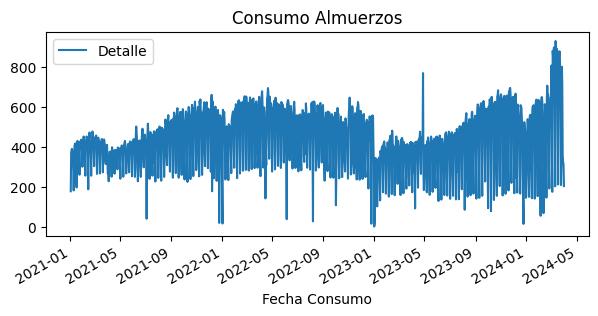

In [70]:
#visualización de la serie vs total de almuerzos
grouped = dfCasinoAlmuerzosCodificado.groupby('Fecha Consumo').agg({ 'Detalle': 'count'})

fig, ax=plt.subplots(figsize=(7, 3))
grouped.plot(ax=ax, label='Detalle')

ax.set_title('Consumo Almuerzos')
ax.legend();

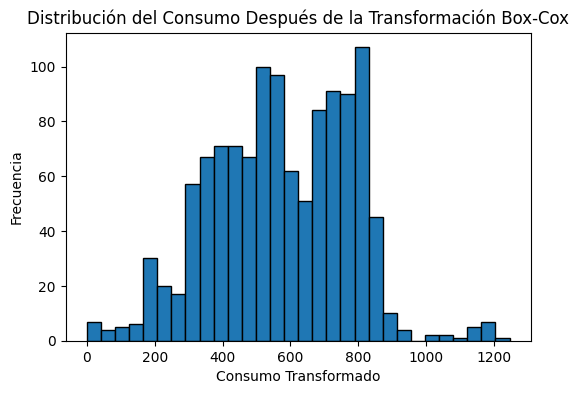

Valor de lambda: 1.0496006228518013


In [16]:

# Aplicar la transformación Box-Cox sobre total de consumo almuerzo por fecha
grouped['consumo_transformado'], lambda_value = boxcox(grouped['Detalle'])

# Visualizar la distribución transformada
plt.figure(figsize=(6, 4))
plt.hist(grouped['consumo_transformado'], bins=30, edgecolor='k')
plt.title('Distribución del Consumo Después de la Transformación Box-Cox')
plt.xlabel('Consumo Transformado')
plt.ylabel('Frecuencia')
plt.show()

# Imprimir el valor de lambda utilizado en la transformación
print('Valor de lambda:', lambda_value)

👣 Al obtener un valor lamba mayor que 1, no se necesita una transformación, por lo tanto es equivalente la transformacion al utilizar los datos originales. A continuacion, trataremos el tema de la varianza no constante que puede indicar que la serie no es estacionaria, aspecto clave para el modelo que deseamos implementar, para ellos nos apoyaremos en las técnicas Dickey-Fuller Aumentada (ADF) y en la prueba de Kwiatkowki-Phillips-Schmidt-Shin (KPSS) para evaluar si hay indicios o ausencia de esta estacionalidad.

Test estacionariedad serie sin diferenciación
ADF Statistic: -3.4731656202966716, p-value: 0.008703602748095377
KPSS Statistic: 1.1755548738439585, p-value: 0.01

Test estacionariedadserie diferenciación de orden 1
ADF Statistic: -7.795825761398471, p-value: 7.722846250700548e-12
KPSS Statistic: 0.07477478068387071, p-value: 0.1


<Axes: title={'center': 'Diferenciación orden 1'}, xlabel='Fecha Consumo'>

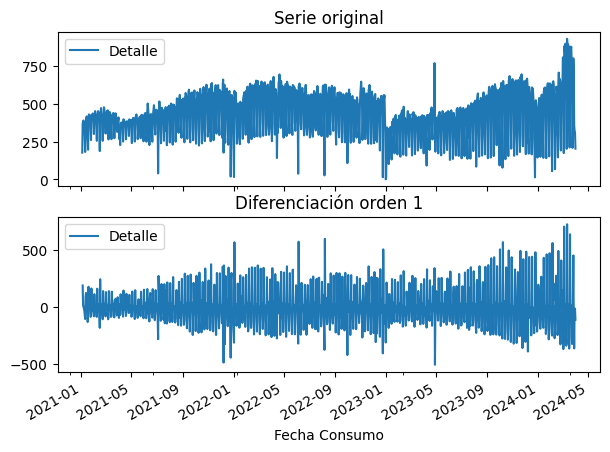

In [77]:
warnings.filterwarnings("ignore")

diferencial_1 = grouped.diff().dropna()
diferencial_2 = diferencial_1.diff().dropna()

print('Test estacionariedad serie sin diferenciación')
resultado_adfuller = adfuller(grouped)
resultado_kpss = kpss(grouped)
print(f'ADF Statistic: {resultado_adfuller[0]}, p-value: {resultado_adfuller[1]}')
print(f'KPSS Statistic: {resultado_kpss[0]}, p-value: {resultado_kpss[1]}')

print('\nTest estacionariedadserie diferenciación de orden 1')
resultado_adfuller = adfuller(diferencial_1)
resultado_kpss = kpss(grouped.diff().dropna())
print(f'ADF Statistic: {resultado_adfuller[0]}, p-value: {resultado_adfuller[1]}')
print(f'KPSS Statistic: {resultado_kpss[0]}, p-value: {resultado_kpss[1]}')

fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(7, 5), sharex=True)
grouped.plot(ax=axs[0], title='Serie original')
diferencial_1.plot(ax=axs[1], title='Diferenciación orden 1')


👣 En el ejercicio obtenemos un valor de diferenciación superior a 0.005 que es el umbral ampliamente reconocido y aceptado, por lo que se entiende que la serie no es estacionaria, se intenta un diferencia del orden 1 pero aun permanece el valor superior al umbral, por lo tanto se debe encontrar el valor de difernecia para futuro modelo de la serie.

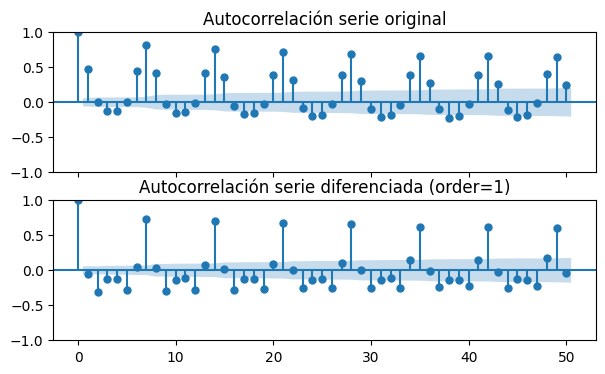

In [78]:
# Grafico de autocorrelación para la serie original y la serie diferenciada
# ==============================================================================
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(7, 4), sharex=True)
plot_acf(grouped, ax=axs[0], lags=50, alpha=0.05)
axs[0].set_title('Autocorrelación serie original')
plot_acf(diferencial_1, ax=axs[1], lags=50, alpha=0.05)
axs[1].set_title('Autocorrelación serie diferenciada (order=1)');

👣 El estudio de las correlaciones indica presencia de estacionalidad ciclica o presencia de patrones temporales que se repiten anualmente. Por lo tanto es otra indicación de que se necesita realizar la diferenciación para encontrar los parametros optimos para el modelamiento.

---
<center> ⏭ operaciones para la selección adecuada de las variables, con el fin de optimizar el uso de recursos y reducir la complejidad del modelo.</center>

---

**Conclusiones de la fase de "Preparación de los datos" en el contexto de la metodología CRISP-ML.**


👣 Durante todo el proceso de preparación de datos realizamos pasos críticos para los cuales la correcta ejecución aseguran en un gran porcentaje el éxito de un modelo de machine learning, desde la limpieza de datos (relleno, eliminación de datos, identificación de outliers), la selección de las características relevantes (con correlación aceptada para el modelo) y la ingeniería de características (transformación de los datos), aseguran el mejoramiento de los datos de entrada al sistema con el objetivo de buscar el mejor desempeño del modelo. Identificamos la importancia de conocer el negocio raíz del problema, ya que la interpretación de los datos y sobre todo los valores atípicos, podrían ser entendidos con este conocimiento.
Resaltamos el enfoque sistemático que nos brinda la metodología CRISP-ML, dado que en las fases realizadas hemos podido generar una secuencia de actividades relacionadas que aseguran el éxito de proyecto, en la fase de comprensión del negocio pudimos ver la necesidad puntual de los usuarios, identificando los pain points del proceso actual. Luego, durante la fase de preparación de los datos aseguramos darle la calidad necesaria a los mismos que se necesitan para la entrada al modelo.
Creemos que con las etapas realizadas y continuando con las siguientes sugeridas según la metodología, estaríamos siendo muy cuidadosos en la búsqueda de maximizar las probabilidades de éxito del proyecto.
